## 5.24

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.linear_model import LogisticRegression
import scipy
from scipy.spatial.distance import pdist,cdist
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC  
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
import re
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, log_loss, classification_report,f1_score,confusion_matrix)
import xgboost
import xgboost as xgb
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import scipy
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [11]:
def plot_histograms(df, variables, n_rows, n_cols):
    fig = plt.figure(figsize=(16, 12))
    for i, var_name in enumerate(variables):
        ax = fig.add_subplot(n_rows, n_cols, i + 1)
        df[var_name].hist(bins=10, ax=ax)
        ax.set_title('Skew:' + str(round(float(df[var_name].skew()),)))  # + ' ' + var_name) #var_name + "distribution")
        ax.set_xticklabels([], visible=False)
        ax.set_yticklabels([], visible=False)
    fig.tight_layout()  # Improves appearance a bit
    plt.show()


def plot_distribution(df, var, target, **kwargs):
    row = kwargs.get('row', None)
    col = kwargs.get('col', None)
    facet = sns.FacetGrid(df, hue=target, aspect=4, row=row, col=col)
    facet.map(sns.kdeplot, var, shade=True)
    facet.set(xlim=(0, df[var].max()))
    facet.add_legend()


def plot_categories(df, cat, target, **kwargs):
    row = kwargs.get('row', None)
    col = kwargs.get('col', None)
    facet = sns.FacetGrid(df, row=row, col=col)
    facet.map(sns.barplot, cat, target)
    facet.add_legend()


def plot_correlation_map(df):
    corr = df.corr()
    _, ax = plt.subplots(figsize=(12, 10))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    _ = sns.heatmap(
        corr,
        cmap=cmap,
        square=True,
        cbar_kws={'shrink': .9},
        ax=ax,
        annot=True,
        annot_kws={'fontsize': 12}
    )


def describe_more(df):
    var = []
    l = []
    t = []
    for x in df:
        var.append(x)
        l.append(len(pd.value_counts(df[x])))
        t.append(df[x].dtypes)
    levels = pd.DataFrame({'Variable': var, 'levels': l, 'Datatype': t})
    levels.sort_values(by='levels', inplace=True)
    return levels


def plot_variable_importance(X, y):
    tree = DecisionTreeClassifier(random_state=99)
    tree.fit(X, y)
    plot_model_var_imp(tree, X, y)


def plot_model_var_imp(model, X, y):
    imp = pd.DataFrame(
        model.feature_importances_,
        columns=['Importance'],
        index=X.columns
    )
    imp = imp.sort_values(['Importance'], ascending=True)
    imp[: 10].plot(kind='barh')
    print(model.score(X, y))

In [193]:
df = pd.read_csv('/Users/taku/Desktop/Data Science/Titanic.csv', header=0, encoding='SHIFT-JIS')
df.info()
titanic = df
train_data = df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='Pclass'>

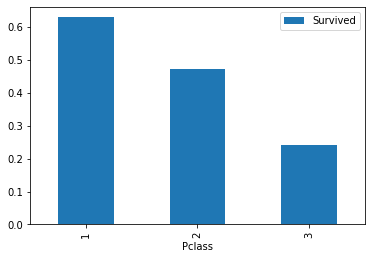

In [13]:
df[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar()

<AxesSubplot:xlabel='Sex'>

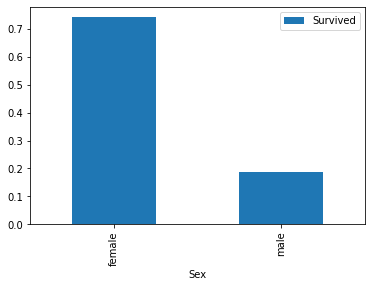

In [15]:
df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()

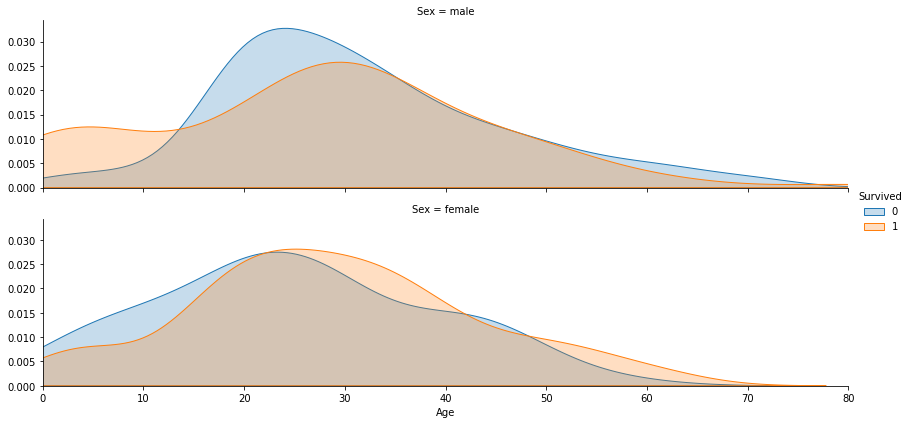

In [16]:
plot_distribution(df, var='Age', target='Survived', row='Sex')

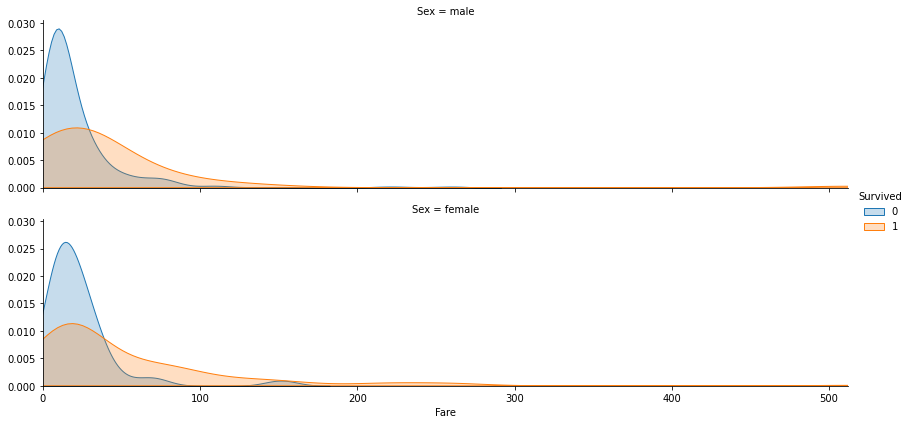

In [19]:
plot_distribution(titanic, var='Fare', target='Survived', row='Sex')

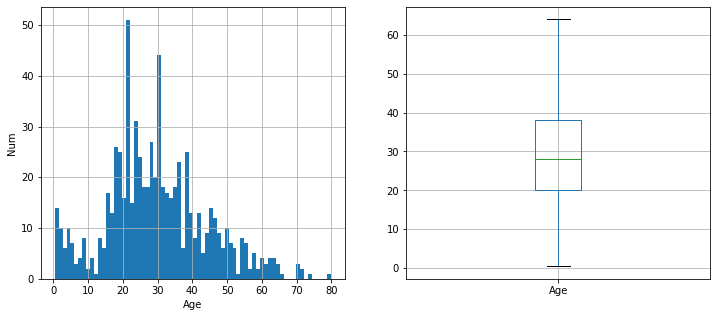

In [22]:
plt.figure(figsize=(12,5))
plt.subplot(121)
df['Age'].hist(bins=70)
plt.xlabel('Age')
plt.ylabel('Num')

plt.subplot(122)
df.boxplot(column='Age', showfliers=False)
plt.show()

<AxesSubplot:xlabel='Age_group'>

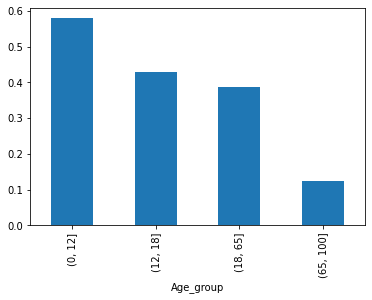

In [25]:
bins = [0, 12, 18, 65, 100]
df['Age_group'] = pd.cut(df['Age'], bins)
by_age = df.groupby('Age_group')['Survived'].mean()
by_age.plot(kind = 'bar')

<AxesSubplot:xlabel='Family_Size'>

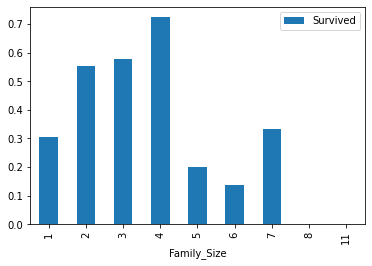

In [28]:
df['Family_Size'] = df['Parch'] + df['SibSp'] + 1
df[['Family_Size','Survived']].groupby(['Family_Size']).mean().plot.bar()

/Users/taku/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/taku/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/taku/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


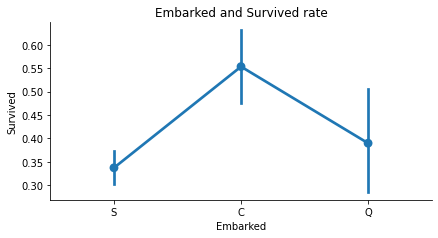

In [35]:
sns.factorplot('Embarked', 'Survived', data=train_data, height=3, aspect=2)
plt.title('Embarked and Survived rate')
plt.show()

In [194]:
from sklearn.ensemble import RandomForestRegressor

#choose training data to predict age
age_df = df[['Age','Survived','Fare', 'Parch', 'SibSp', 'Pclass']]
age_df_notnull = age_df.loc[(df['Age'].notnull())]
age_df_isnull = age_df.loc[(df['Age'].isnull())]
X = age_df_notnull.values[:,1:]
Y = age_df_notnull.values[:,0]
# use RandomForestRegression to train data
RFR = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
RFR.fit(X,Y)
predictAges = RFR.predict(age_df_isnull.values[:,1:])
df.loc[df['Age'].isnull(), ['Age']]= predictAges

In [195]:
df.Embarked[df.Embarked.isnull()] = df.Embarked.dropna().mode().values

<ipython-input-195-c4ae4ee67e40>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Embarked[df.Embarked.isnull()] = df.Embarked.dropna().mode().values


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Family_Size  891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [196]:
sex_mapDict = {'male':1,'female':0} 

df['Sex']=df['Sex'].map(sex_mapDict)  
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [191]:
#存放提取后的特征
embarkedDf = pd.DataFrame()
#使用get_dummies进行one-hot编码，产生虚拟变量（dummy variables），列名前缀是Embarked
embarkedDf=pd.get_dummies(df['Embarked'],prefix='Embarked')
#添加one-hot编码产生的虚拟变量（dummy variables）到泰坦尼克号数据集full
df=pd.concat([df,embarkedDf],axis=1)
#将登船港口(Embarked)删掉
df.drop('Embarked',axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare,FamilySize,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,7.2500,2,0,0,1
1,1,1,0,38.0,71.2833,2,1,0,0
2,1,3,0,26.0,7.9250,1,0,0,1
3,1,1,0,35.0,53.1000,2,0,0,1
4,0,3,1,35.0,8.0500,1,0,0,1


In [47]:
pclassDf = pd.DataFrame()
#使用get_dummies进行one-hot编码，列名前缀是Pclass
pclassDf = pd.get_dummies( df['Pclass'] , prefix='Pclass' )
pclassDf.head()
#添加one-hot编码产生的虚拟变量（dummy variables）到泰坦尼克号数据集full
df=pd.concat([df,pclassDf],axis=1)
#删掉客舱等级（Pclass）这一列
df.drop('Pclass',axis=1,inplace=True)
df.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Family_Size,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,2,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,0,0,1,1,0,0
4,5,0,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1,0,0,1,0,0,1


In [197]:
#存放家庭信息
familyDf=pd.DataFrame()
#计算家庭人数
familyDf['FamilySize']=df['Parch']+df['SibSp']+1
#对家庭进行分类
# familyDf['Family_Single']=familyDf['FamilySize'].map(lambda s: 1 if s==1 else 0)
# familyDf['Family_Small']=familyDf['FamilySize'].map(lambda s: 1 if 2<=s<=4 else 0)
# familyDf['Family_Large']=familyDf['FamilySize'].map(lambda s: 1 if 5<=s else 0)
familyDf.head()
#添加one-hot编码产生的虚拟变量（dummy variables）到泰坦尼克号数据集full
df=pd.concat([df,familyDf],axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,1


In [55]:
# df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'],axis=1,inplace=True)
df.drop('FamilySize',axis=1,inplace=True)


df.head()

,Survived,Sex,Age,Fare,Family_Size,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Family_Single,Family_Small,Family_Large
0,0,1,22.0,7.2500,2,0,0,1,0,0,1,0,1,0
1,1,0,38.0,71.2833,2,1,0,0,1,0,0,0,1,0
2,1,0,26.0,7.9250,1,0,0,1,0,0,1,1,0,0
3,1,0,35.0,53.1000,2,0,0,1,1,0,0,0,1,0
4,0,1,35.0,8.0500,1,0,0,1,0,0,1,1,0,0


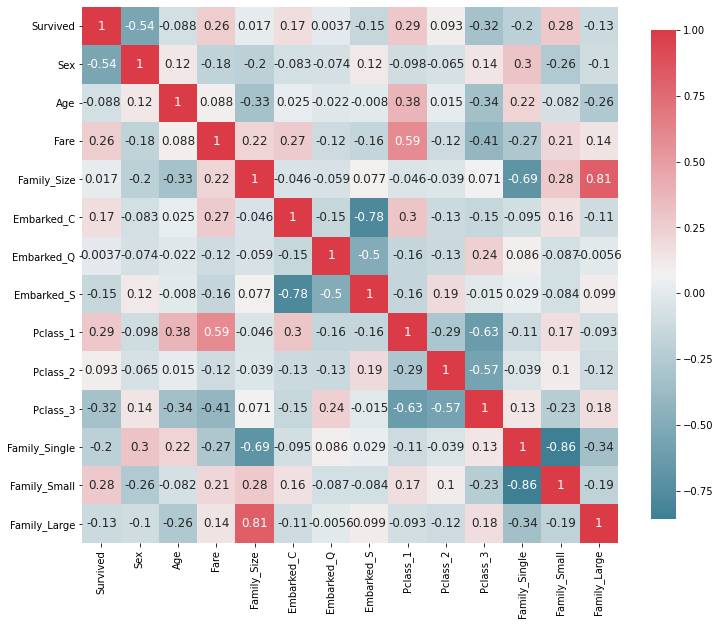

In [56]:
plot_correlation_map(df)

In [57]:
from sklearn import preprocessing

assert np.size(df['Age']) == 891
# StandardScaler will subtract the mean from each value then scale to the unit variance
scaler = preprocessing.StandardScaler()
df['Age'] = scaler.fit_transform(df['Age'].values.reshape(-1, 1))
df['Age'].head()

0   -0.557517
1    0.607338
2   -0.266303
3    0.388928
4    0.388928
Name: Age, dtype: float64

In [74]:
scale_age_fare = preprocessing.StandardScaler().fit(df[['Age','Fare']])
df[['Age','Fare']] = scale_age_fare.transform(df[['Age','Fare']]).values.reshape(-1, 1))
df[['Age','Fare']].describe()

,Age,Fare
count,8.910000e+02,8.910000e+02
mean,1.727637e-16,-4.373606e-17
std,1.000562e+00,1.000562e+00
min,-2.128615e+00,-6.484217e-01
25%,-6.303202e-01,-4.891482e-01
50%,-1.206963e-01,-3.573909e-01
75%,5.345345e-01,-2.424635e-02
max,3.665081e+00,9.667167e+00


In [192]:
df.head()


,Survived,Pclass,Sex,Age,Fare,FamilySize,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,7.2500,2,0,0,1
1,1,1,0,38.0,71.2833,2,1,0,0
2,1,3,0,26.0,7.9250,1,0,0,1
3,1,1,0,35.0,53.1000,2,0,0,1
4,0,3,1,35.0,8.0500,1,0,0,1


In [79]:
X = df.drop('Survived',axis=1,inplace=False)
y = df['Survived']


In [131]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100]}

model = LogisticRegression()
grid_search = GridSearchCV(model, param_grid, cv=10,
                          scoring='accuracy')
 
grid_search.fit(X, y)

print(grid_search.best_score_)  
print(grid_search.best_params_)
print(grid_search.best_estimator_)

0.8249188514357053
{'C': 100}
LogisticRegression(C=100)


In [132]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': range(10,100,10), "max_features":range(1,10,1)}

model = RandomForestClassifier()
grid_search = GridSearchCV(model, param_grid, cv=10,
                          scoring='accuracy')
 
grid_search.fit(X, y)

print(grid_search.best_score_)  
print(grid_search.best_params_)
print(grid_search.best_estimator_)


0.8361922596754058
{'max_features': 7, 'n_estimators': 20}
RandomForestClassifier(max_features=7, n_estimators=20)


In [133]:
from sklearn.model_selection import GridSearchCV

param_grid = {'learning_rate':np.linspace(0.05,0.25,5), 'max_depth': range(1,8,1),
              'min_samples_leaf':range(1,5,1), 'n_estimators':range(50,100,10)}

model = GradientBoostingClassifier()
grid_search = GridSearchCV(model, param_grid, cv=10,
                          scoring='accuracy')
 
grid_search.fit(X, y)

print(grid_search.best_score_)  
print(grid_search.best_params_)
print(grid_search.best_estimator_)

0.8631086142322097
{'learning_rate': 0.05, 'max_depth': 5, 'min_samples_leaf': 3, 'n_estimators': 90}
GradientBoostingClassifier(learning_rate=0.05, max_depth=5, min_samples_leaf=3,
                           n_estimators=90)


In [135]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        'weights': ['uniform'],
        'n_neighbors': [i for i in range(1, 11)]
    },
    {
        'weights': ['distance'],
        'n_neighbors': [i for i in range(1, 11)],
        'p': [i for i in range(1, 3)]
    }]

model = KNeighborsClassifier()
grid_search = GridSearchCV(model, param_grid, cv=10,
                          scoring='accuracy')
 
grid_search.fit(X, y)

print(grid_search.best_score_)  
print(grid_search.best_params_)
print(grid_search.best_estimator_)

0.8081398252184769
{'n_neighbors': 5, 'weights': 'uniform'}
KNeighborsClassifier()


In [140]:
from sklearn.model_selection import GridSearchCV

param_grid = {"C":[0.1, 1, 10, 100], "gamma":[1, 0.1, 0.01, 0.001]}

model = SVC()
grid_search = GridSearchCV(model, param_grid, cv=10,
                          scoring='accuracy')
 
grid_search.fit(X, y)

print(grid_search.best_score_)  
print(grid_search.best_params_)
print(grid_search.best_estimator_)

0.8271660424469411
{'C': 100, 'gamma': 0.01}
SVC(C=100, gamma=0.01)


In [142]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

model = GaussianNB(priors=None)

scores = cross_val_score(model, X, y, cv=10)
print("Cross validation scores:{}".format(scores))
print("Mean cross validation score:{:2f}".format(scores.mean()))

Cross validation scores:[0.65555556 0.6741573  0.75280899 0.76404494 0.76404494 0.78651685
 0.83146067 0.7752809  0.7752809  0.85393258]
Mean cross validation score:0.763308


0.8238451935081148
{'max_depth': 6}
DecisionTreeClassifier(max_depth=6)


In [201]:
EmbarkedDict = {'S':1, 'C':2, 'Q':3} 

df['Embarked']=df['Embarked'].map(EmbarkedDict)  
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,1,22.0,7.2500,1,2
1,1,1,0,38.0,71.2833,2,2
2,1,3,0,26.0,7.9250,1,1
3,1,1,0,35.0,53.1000,1,2
4,0,3,1,35.0,8.0500,1,1


In [202]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,1,22.0,7.2500,1,2
1,1,1,0,38.0,71.2833,2,2
2,1,3,0,26.0,7.9250,1,1
3,1,1,0,35.0,53.1000,1,2
4,0,3,1,35.0,8.0500,1,1


In [199]:
df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [203]:
x1 = df.drop('Survived', axis=1)
x1

,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,3,1,22.000000,7.2500,1,2
1,1,0,38.000000,71.2833,2,2
2,3,0,26.000000,7.9250,1,1
3,1,0,35.000000,53.1000,1,2
4,3,1,35.000000,8.0500,1,1
...,...,...,...,...,...,...
886,2,1,27.000000,13.0000,1,1
887,1,0,19.000000,30.0000,1,1
888,3,0,24.933562,23.4500,1,4
889,1,1,26.000000,30.0000,2,1


In [204]:
y1 = df['Survived']
y1

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

最优参数以及最高得分: [4.         0.82830212]


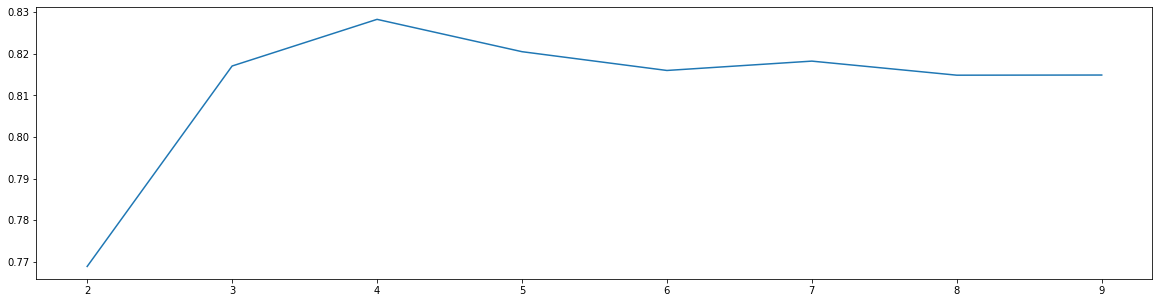

In [209]:
###在大范围内画出max_depth这个参数变化曲线
ScoreAll = []
for i in range(2,10,1):
    DT = DecisionTreeClassifier(max_depth = i,random_state = 66)
    score = cross_val_score(DT,x1,y1,cv=10).mean()
    ScoreAll.append([i,score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll==np.max(ScoreAll[:,1]))[0][0] ##这句话看似很长的，其实就是找出最高得分对应的索引
print("最优参数以及最高得分:",ScoreAll[max_score])  
# print(ScoreAll[,0])
plt.figure(figsize=[20,5])
plt.plot(ScoreAll[:,0],ScoreAll[:,1])
plt.show()

最优参数以及最高得分: [14.          0.81605493]


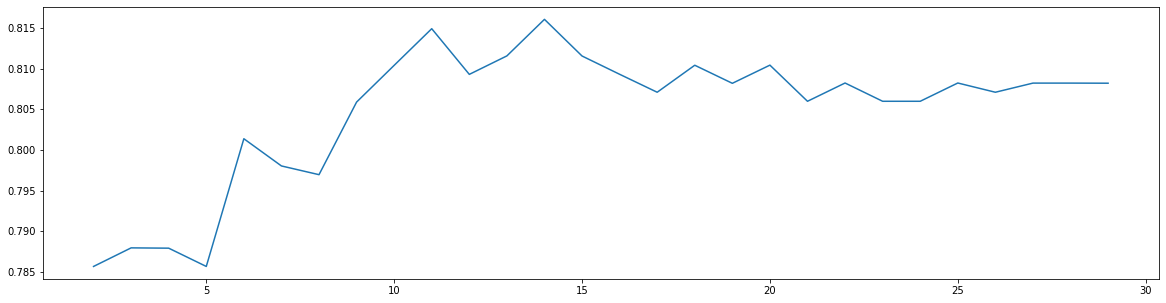

In [210]:
#单独看看min_samples_split的变化趋势
ScoreAll = []
for i in range(2,30):
    DT = DecisionTreeClassifier(max_depth = 13,min_samples_split = i,random_state = 66)
    score = cross_val_score(DT,x1,y1,cv=10).mean()
    ScoreAll.append([i,score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll==np.max(ScoreAll[:,1]))[0][0] ##这句话看似很长的，其实就是找出最高得分对应的索引
print("最优参数以及最高得分:",ScoreAll[max_score])  
# print(ScoreAll[,0])
plt.figure(figsize=[20,5])
plt.plot(ScoreAll[:,0],ScoreAll[:,1])
plt.show()

最优参数以及最高得分: [7.        0.8328839]


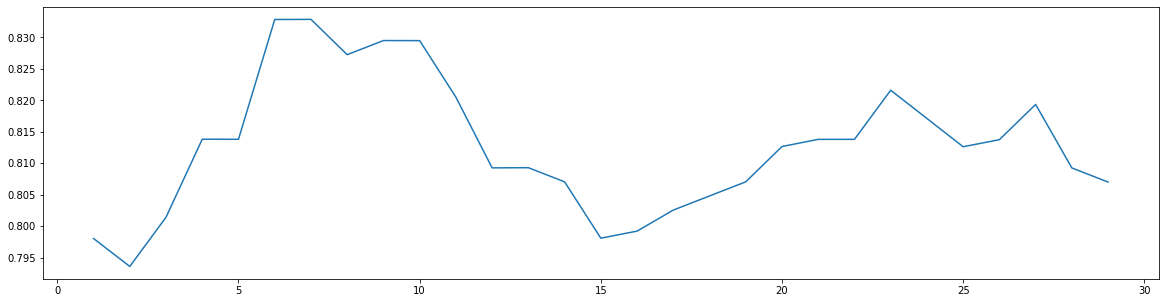

In [211]:
###调min_samples_leaf这个参数
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

ScoreAll = []
for i in range(1,30):
    DT = DecisionTreeClassifier(min_samples_leaf = i,min_samples_split = 7,max_depth = 13,random_state = 66)
    score = cross_val_score(DT,x1,y1,cv=10).mean()
    ScoreAll.append([i,score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll==np.max(ScoreAll[:,1]))[0][0] ##这句话看似很长的，其实就是找出最高得分对应的索引
print("最优参数以及最高得分:",ScoreAll[max_score])  
# print(ScoreAll[,0])
plt.figure(figsize=[20,5])
plt.plot(ScoreAll[:,0],ScoreAll[:,1])
plt.show()

In [237]:
y1.unique()

array([0, 1])

In [213]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV

param_grid = {"max_depth":range(4, 7), 'min_samples_split':range(10, 16),
             'min_samples_leaf':range(5, 11)}

model = tree.DecisionTreeClassifier()
grid_search = GridSearchCV(model, param_grid, cv=10,
                          scoring='accuracy')
 
grid_search.fit(x1, y1)

print(grid_search.best_score_)  
print(grid_search.best_params_)
print(grid_search.best_estimator_)



0.8373033707865168
{'max_depth': 5, 'min_samples_leaf': 9, 'min_samples_split': 11}
DecisionTreeClassifier(max_depth=5, min_samples_leaf=9, min_samples_split=11)


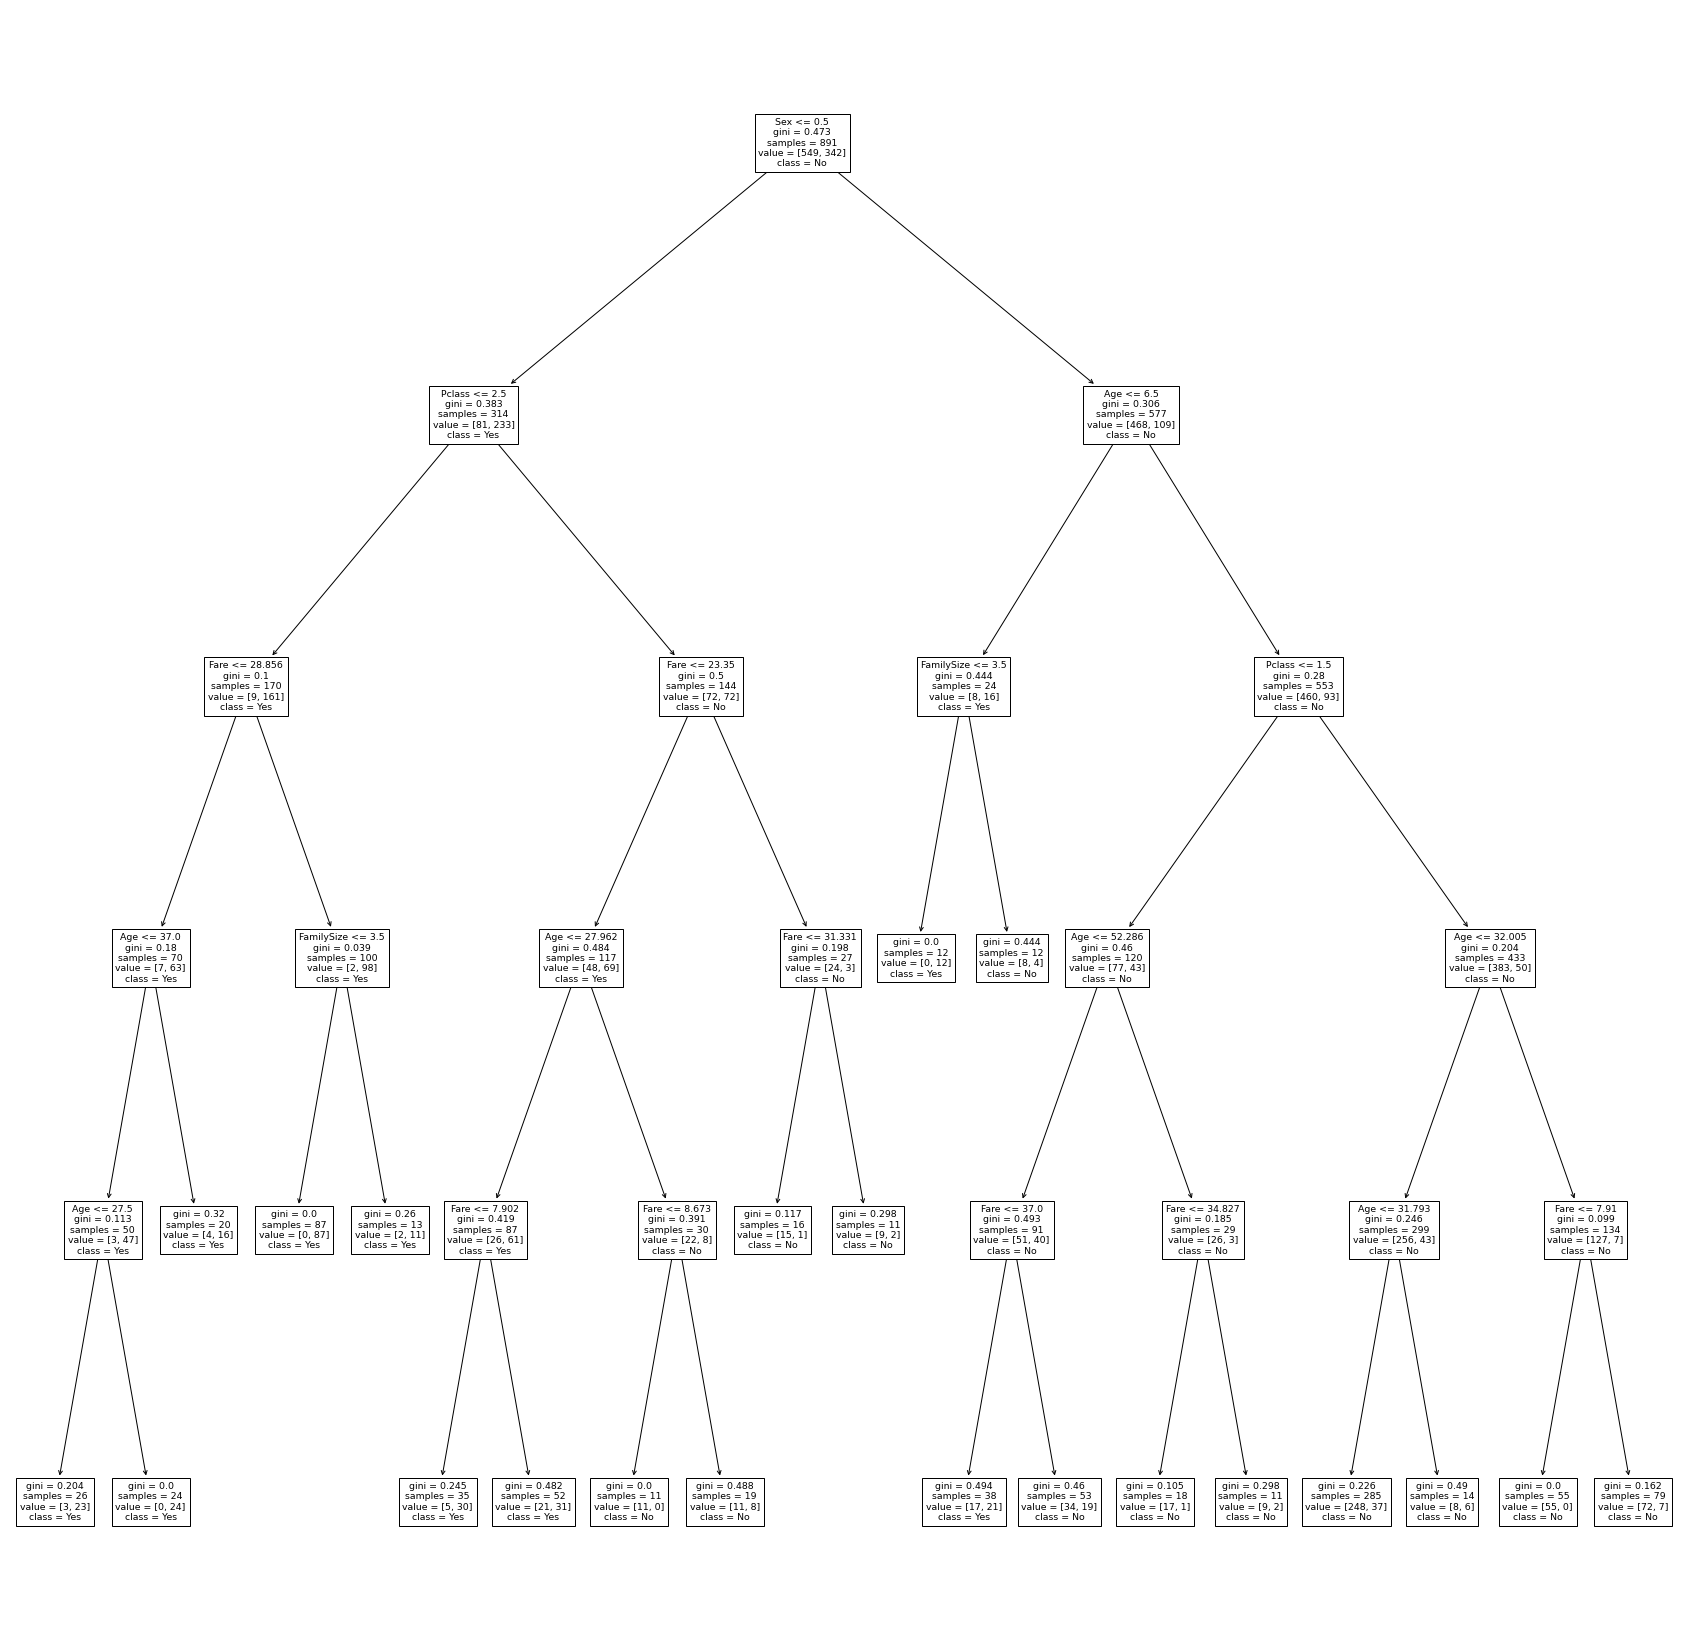

In [240]:
model = tree.DecisionTreeClassifier(max_depth=5, min_samples_split=9 , min_samples_leaf=11)
model.fit(x1, y1)
fig, ax = plt.subplots(figsize=(30, 30))  # whatever size you want
tree.plot_tree(model, feature_names=x1.columns,  
                     class_names=['No', 'Yes'], ax=ax)
plt.savefig('./test.jpg')
plt.show()

In [232]:
import graphviz


In [230]:
y1.name

'Survived'